In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)

In [3]:
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.cx(q[1], q[0])
circuit.cx(q[0], q[1])

circuit.draw()

┌───┐     ┌───┐     
q0_0: ┤ H ├──■──┤ X ├──■──
      └───┘┌─┴─┐└─┬─┘┌─┴─┐
q0_1: ─────┤ X ├──■──┤ X ├
           └───┘     └───┘
c0: 2/════════════════════

In [4]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


In [5]:
circuit.measure(q,c)
circuit.draw()

┌───┐     ┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤ X ├──■──┤M├───
      └───┘┌─┴─┐└─┬─┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├──■──┤ X ├─╫─┤M├
           └───┘     └───┘ ║ └╥┘
c0: 2/═════════════════════╩══╩═
                           0  1

{'10': 547, '00': 477}


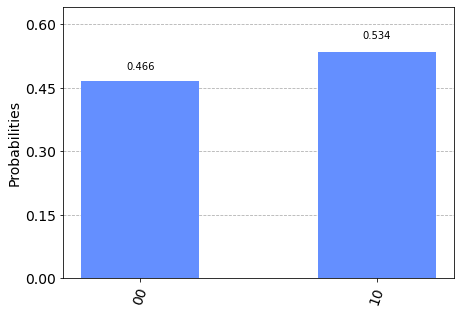

In [6]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)